In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import community
from sklearn import cluster
from collections import defaultdict
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
import palettable

In [3]:
graph = json.load(open('8.10.5.json'))
G = nx.Graph(graph)

graphs = list(nx.connected_component_subgraphs(G))
G_sub = G.subgraph(graphs[0])
A = nx.adjacency_matrix(G_sub)

In [4]:
def myplot(nodes,C):
    for group in nodes:
        sub_pos = C[nodes[group]]
        plt.scatter(sub_pos[:,0],sub_pos[:,1],color = plt.cm.spectral(group / 10.),linewidths = 0.1,alpha=0.1)

    plt.show()


find spectral embedding of adjacancy matrix A

In [5]:
embedding = manifold.SpectralEmbedding(affinity = 'precomputed')
B = A.todense()
embedding.fit(B)
C = embedding.fit_transform(B)

## using community partition 

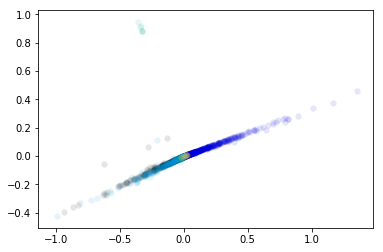

In [6]:
partition = community.best_partition(G_sub, resolution = 1.5)
nodes = defaultdict(list)
for node, group in partition.items():
    nodes[group].append(int(node))
#     print node
myplot(nodes,C)

## using spectral Clustering

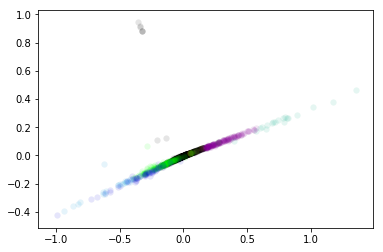

In [7]:
spectral = cluster.SpectralClustering(affinity = 'precomputed')
spectral.fit(A.todense())
clusters = spectral.fit_predict(B)
nodes = defaultdict(list)
partition = defaultdict(int)
for group, node in zip(clusters, range(len(clusters))):
    nodes[group].append(node)
    partition[node] = group
myplot(nodes,C)